In [5]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")

# Modelling with a power spectral density


The power spectral density function of the time series is represented by the object {class}`~pioran.psd_base.PowerSpectralDensity`. More details about this class and the implemented models can be found [here](../apidoc/PSD). We will describe how to use, combine and create models for the power spectral density function in the following sections.

## A first model

We show how to use the models implemented in {mod}`pioran.psd` to compute the power spectrum at given frequencies. We first define an instance of the chosen class. In this example, we create instances of the classes {class}`~pioran.psd.Lorentzian` and {class}`~pioran.psd.Gaussian`. 

The values of the parameters of the models are given as a list of floats, during instantiation.

In [6]:
from pioran.psd import Lorentzian, Gaussian

Lore = Lorentzian([0,1, 0.5])
Gauss = Gaussian([0,1.2, 0.5])

A ``PowerSpectralDensity`` object has a field ``parameters`` which an object of the class {class}`~pioran.parameters.ParametersModel` storing for the parameters of the model. We can inspect the values of the parameters of the model by printing the ``PowerSpectralDensity`` object. 

In [7]:
print(Lore)

Power spectrum: lorentzian
Number of parameters: 3
CID  ID   Name            Value          Status    Linked    Type            
1    1    position        0              Free      No        Hyper-parameter 
1    2    amplitude       1              Free      No        Hyper-parameter 
1    3    halfwidth       0.5            Free      No        Hyper-parameter 




If we want to change the values of the parameters of the model, we can use the method ``set_free_values`` on the attribute``PowerSpectralDensity.parameters``. The method takes as input a list of floats, which are the values of the free parameters of the model. Currently, it is not possible to change the values of the fixed parameters of the model after instantiation. To do so, we need to create a new instance of the model and set the parameters as free or fixed using the keyword argument ``free_parameters``. More details about the class {class}`~pioran.parameters.ParametersModel` can be found [here](../apidoc/Parameters).

In [8]:
Lore.parameters.set_free_values([0.9,2.2, 1.5])
print(Lore)

Power spectrum: lorentzian
Number of parameters: 3
CID  ID   Name            Value          Status    Linked    Type            
1    1    position        0.9            Free      No        Hyper-parameter 
1    2    amplitude       2.2            Free      No        Hyper-parameter 
1    3    halfwidth       1.5            Free      No        Hyper-parameter 




We can evaluate the PSD at given frequencies by calling the method ``calculate`` of the ``PowerSpectralDensity`` object. The method ``calculate`` takes as input a list of floats representing the frequencies at which the PSD is evaluated. The method returns a list of floats representing the values of the PSD at the given frequencies.

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


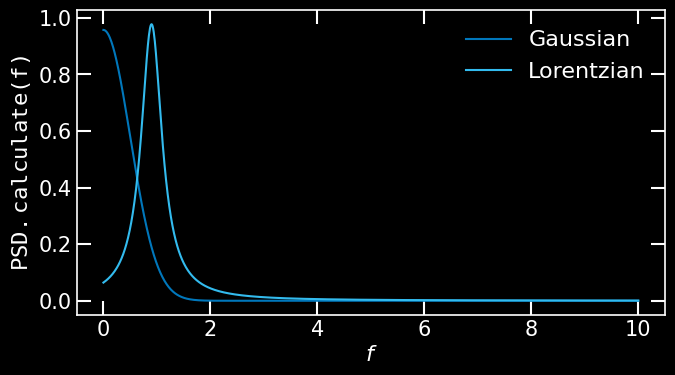

In [9]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(t, Gauss.calculate(t), label="Gaussian")
ax.plot(t, Lore.calculate(t), label="Lorentzian")
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\tt{PSD.calculate}(f)$')
ax.legend()
fig.tight_layout()

## Combining PSD models

In this section, we show how to combine power spectral density functions via arithmetic operations.

In this example we create instances of the classes {class}`~pioran.psd.Gaussian` and {class}`~pioran.psd.Lorentzian`.

In [10]:
from pioran.psd import Lorentzian, Gaussian

Lore = Lorentzian([3,1, 1.5])
Gauss = Gaussian([0,1.2, 0.5])
Gauss2 = Gaussian([6,1.4, 2.5])

### Sum of PSD functions

We can create a model which is the sum of the three components by using the ``+`` operator. The result is a new instance of the class {class}`~pioran.psd_base.PowerSpectralDensity`. We can inspect the parameters of the model by printing the object.

In [11]:
Model = Lore + Gauss + Gauss2
print(Model)

Power spectrum: lorentzian + gaussian + gaussian
Number of parameters: 9
CID  ID   Name            Value          Status    Linked    Type            
1    1    position        3              Free      No        Hyper-parameter 
1    2    amplitude       1              Free      No        Hyper-parameter 
1    3    halfwidth       1.5            Free      No        Hyper-parameter 
2    4    position        0              Free      No        Hyper-parameter 
2    5    amplitude       1.2            Free      No        Hyper-parameter 
2    6    sigma           0.5            Free      No        Hyper-parameter 
3    7    position        6              Free      No        Hyper-parameter 
3    8    amplitude       1.4            Free      No        Hyper-parameter 
3    9    sigma           2.5            Free      No        Hyper-parameter 




Because several parameters have identical names it is necessary to use the indices of the parameters to access them. ``CID`` gives the component index and ``ID`` gives the parameter index in the whole model.

In [12]:
print(Model.parameters[5])

2    5    amplitude       1.2            Free      No        Hyper-parameter 


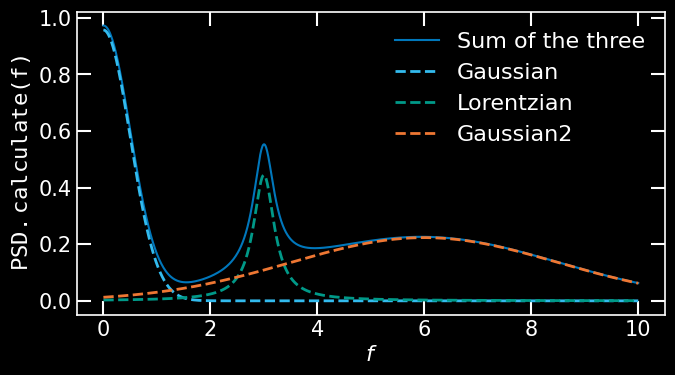

In [13]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.plot(t, Model.calculate(t), label="Sum of the three")
ax.plot(t, Gauss.calculate(t), label="Gaussian", lw=2,ls="--")
ax.plot(t, Lore.calculate(t), label="Lorentzian", lw=2,ls="--")
ax.plot(t, Gauss2.calculate(t), label="Gaussian2", lw=2,ls="--")
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\tt{PSD.calculate}(f)$')
ax.legend()
fig.tight_layout()

### Product of PSD functions

We can create a model which is a product of PSD functions by using the ``*`` operator. The result is a new instance of the class {class}`~pioran.psd_base.PowerSpectralDensity`. We show an example with the product of the two first components plus the third component.

In [14]:
Lore = Lorentzian([3,1, 1.5])
Gauss = Gaussian([0,3.2, 3.5])
Gauss2 = Gaussian([2,1.4, 2.5])

Model = Lore + Gauss * Gauss2
print(Model)

Power spectrum: lorentzian + gaussian * gaussian
Number of parameters: 9
CID  ID   Name            Value          Status    Linked    Type            
1    1    position        3              Free      No        Hyper-parameter 
1    2    amplitude       1              Free      No        Hyper-parameter 
1    3    halfwidth       1.5            Free      No        Hyper-parameter 
2    4    position        0              Free      No        Hyper-parameter 
2    5    amplitude       3.2            Free      No        Hyper-parameter 
2    6    sigma           3.5            Free      No        Hyper-parameter 
3    7    position        2              Free      No        Hyper-parameter 
3    8    amplitude       1.4            Free      No        Hyper-parameter 
3    9    sigma           2.5            Free      No        Hyper-parameter 




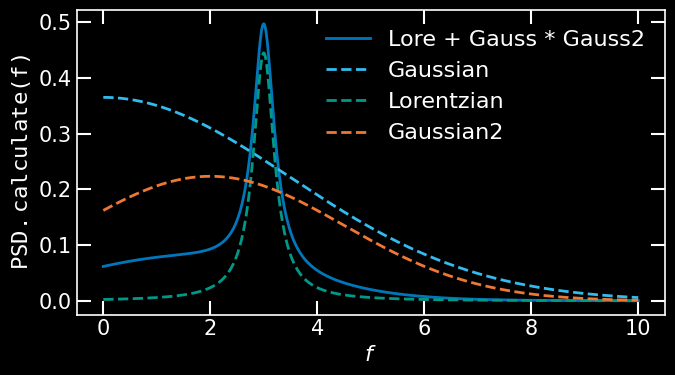

In [15]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.plot(t, Model.calculate(t), label="Lore + Gauss * Gauss2", lw=2)
ax.plot(t, Gauss.calculate(t), label="Gaussian", lw=2,ls="--")
ax.plot(t, Lore.calculate(t), label="Lorentzian", lw=2,ls="--")
ax.plot(t, Gauss2.calculate(t), label="Gaussian2", lw=2,ls="--")
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\tt{PSD.calculate}(f)$')
ax.legend()
fig.tight_layout()

## Conversion to an autocovariance function

To use PSD models which have no analytical expression for the autocovariance function we have to compute the Fourier Transform of the PSD. This is done using the class {class}`~pioran.psdtoacv.PSDToACV`. The class takes as input a ``PowerSpectralDensity`` object and computes the Fourier Transform of the PSD. The class has a method ``calculate`` which takes as input a list of floats representing the time lags at which the autocovariance function is evaluated. The method returns a list of floats representing the values of the autocovariance function at the given time lags.

We first define a PSD model, here a Lorentzian. We then create an instance of the class {class}`~pioran.psdtoacv.PSDToACV`, four other values are necessary to do so. The total duration of the time series $T$, $\Delta T$ the minimal time step between two consecutive points in the time series, $S_\mathrm{low}$ and $S_\mathrm{high}$ two factors to extend the grid of frequencies used to compute the Fourier Transform.

The extended grid of frequencies is then given by $f_0 = f_\mathrm{min}/S_\mathrm{low} = \Delta f$ to $f_N = f_\mathrm{max}S_\mathrm{high}=N \Delta f$, where $f_\mathrm{min}=1/T$ and $f_\mathrm{max}=1/2\Delta T$. More details about these two factors can be found in the Notebook [on the FFT](../references/On_the_fft.ipynb).


```{eval-rst}
.. tikz:: 
    :xscale: 90

    [thick]

    \draw (0,2pt) -- + (0,-2pt) node[below=1mm] {0};
    \draw (.5,2pt) -- + (0,-2pt) node[below=1mm] {$f_0$};
    \draw (3.5,5pt) -- + (0,-5pt) node[below=1mm] {$f_\mathrm{min}$};
    \draw (10.,5pt) -- + (0,-5pt) node[below=1mm] {$f_\mathrm{max}$};
    \draw (14,5pt) -- + (0,-5pt) node[below=1mm] {$f_\mathrm{N}$};
    \draw[thick] (0,0) -- node[below=7mm] {Frequency $f$} + (15,0);
    \foreach \x in {0,0.5,...,14.}
       \draw (\x cm,3pt) -- (\x cm,-3pt) node[anchor=north] {};
```

In [26]:
from pioran import PSDToACV

Lore = Lorentzian([0, 1, .5])
P2A = PSDToACV(PSD=Lore, S_low=10, S_high=10, T=100, dt=1, method="FFT")

We can evaluate the autocovariance of the time series at given time lags by calling the method ``calculate`` of the ``PSDToACV`` object. The method ``calculate`` takes as input a list of floats representing the time lags at which the autocovariance function is evaluated. The method returns a list of floats representing the values of the autocovariance function at the given time lags. 

In [24]:
f = P2A.frequencies
t = jnp.linspace(0, 100, 1000)
acv = P2A.calculate(t)

We show the original PSD and the autocovariance function computed from the PSD.

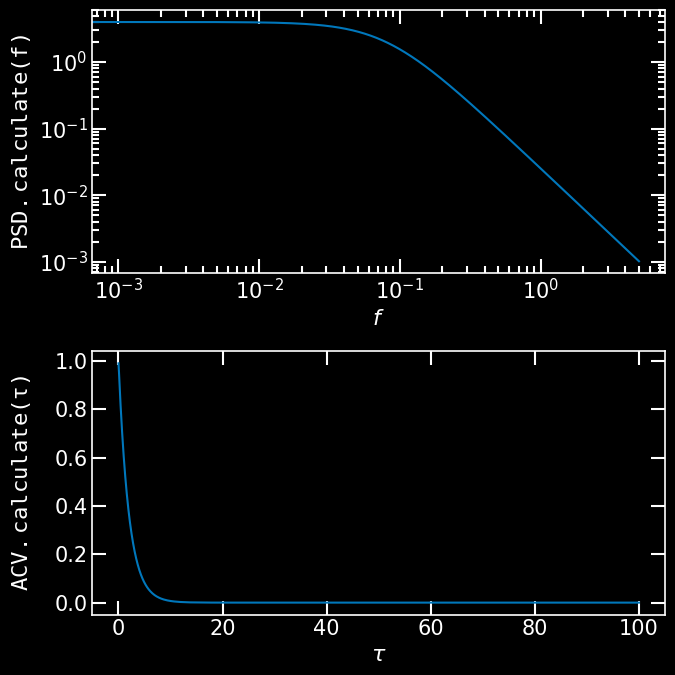

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

ax[0].loglog(f, Lore.calculate(f), label="Lorentzian")
ax[0].set_xlabel(r'$f$')
ax[0].set_ylabel(r'$\tt{PSD.calculate}(f)$')

ax[1].plot(t, acv, label="ACV")
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$\tt{ACV.calculate}(\tau)$')

fig.align_ylabels()
fig.tight_layout()

## Writing a new model

Here we show how to write a PSD new model, which can be used like any models we have shown above.

### Creating the class and the constructor
We write a new class ``MyPSD``, which inherits from `PowerSpectralDensity`. It is important to specify the attributes ``parameters`` and ``expression`` at the class level since `PowerSpectralDensity` inherits from {class}`~equinox.Module`. ``parameters`` is an object of the class {class}`~pioran.parameters.ParametersModel` which is a container for the parameters of the model. The constructor ``__init__`` must be defined as in the example and the names of the parameters are given in the ``param_names`` list. 



### The ``calculate`` method
The ``calculate`` method must be defined and it must return the PSD function evaluated at the frequencies ``f``. When writing the expression of the PSD function, the values of parameters of the model can be accessed using the attribute ``self.parameters['name'].value`` where ``name`` is the name of the parameter.

In [ ]:
import jax.numpy as jnp
from pioran import PowerSpectralDensity, ParametersModel


class MyPSD(PowerSpectralDensity):
    parameters: ParametersModel
    expression = 'my_psd'
    
    def __init__(self, parameters_values, **kwargs):
        """Constructor of the power spectrum inherited 
        from the PowerSpectralDensity class.
        """
        assert len(parameters_values) == 3, 'The number of parameters must be 3'
        free_parameters = kwargs.get('free_parameters', [True, True,True])
        # initialise the parameters and check
        PowerSpectralDensity.__init__(self, param_values=parameters_values, param_names=['amplitude', 'freq','power'], free_parameters=free_parameters)
    
    def calculate(self,f) -> jnp.ndarray:
        """Calculate the power spectrum at the given frequencies."""
        return self.parameters['amplitude'].value  /  ( 1+f/self.parameters['freq'].value)**self.parameters['power'].value


We can use the newly defined model as any other models we have shown above:

In [ ]:
P = MyPSD([1., 0.5,3.4])
frequencies = jnp.linspace(0, 5, 1000)
PSD = P.calculate(frequencies)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(frequencies, PSD)
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\tt{PSD.calculate}(f)$')
ax.loglog()
fig.tight_layout()